# Salish Sea Bathymetry
this following the [generate bathymetry](https://clima.github.io/ClimaOceanDocumentation/stable/literated/generate_bathymetry/) example from ClimaOcean

In [2]:
] activate "../oceananigans-env/"

  Activating project at `~/oceananigans-salish-pinn/oceananigans-env`


In [3]:
using ClimaOcean
using Oceananigans
using CairoMakie

In [15]:
arch = CPU()

#latitude_range = (48, 49)
#longitude_range = (236, 237) # -124 / -123
latitude_range = (47, 50)
longitude_range = (234, 239)
z_range = (-2000, 0)


Nφ = 25 * (latitude_range[2] - latitude_range[1])
Nλ = 25 * (longitude_range[2] - longitude_range[1])
Nz = 25 * (z_range[2] - z_range[1])

grid = LatitudeLongitudeGrid(
    arch, 
    size = (Nλ, Nφ, Nz),
    latitude = latitude_range,
    longitude = longitude_range,
    z = z_range,
    halo = (7, 7, 1)
)

125×75×50000 LatitudeLongitudeGrid{Float64, Bounded, Bounded, Bounded} on CPU with 7×7×1 halo and with precomputed metrics
├── longitude: Bounded  λ ∈ [234.0, 239.0] regularly spaced with Δλ=0.04
├── latitude:  Bounded  φ ∈ [47.0, 50.0]   regularly spaced with Δφ=0.04
└── z:         Bounded  z ∈ [-2000.0, 0.0] regularly spaced with Δz=0.04

In [16]:
bathymetry = ClimaOcean.regrid_bathymetry(grid)

125×75×1 Field{Center, Center, Nothing} reduced over dims = (3,) on LatitudeLongitudeGrid on CPU
├── grid: 125×75×50000 LatitudeLongitudeGrid{Float64, Bounded, Bounded, Bounded} on CPU with 7×7×1 halo and with precomputed metrics
├── boundary conditions: FieldBoundaryConditions
│   └── west: ZeroFlux, east: ZeroFlux, south: ZeroFlux, north: ZeroFlux, bottom: Nothing, top: Nothing, immersed: ZeroFlux
└── data: 139×89×1 OffsetArray(::Array{Float64, 3}, -6:132, -6:82, 1:1) with eltype Float64 with indices -6:132×-6:82×1:1
    └── max=2717.28, min=-2518.7, mean=303.844

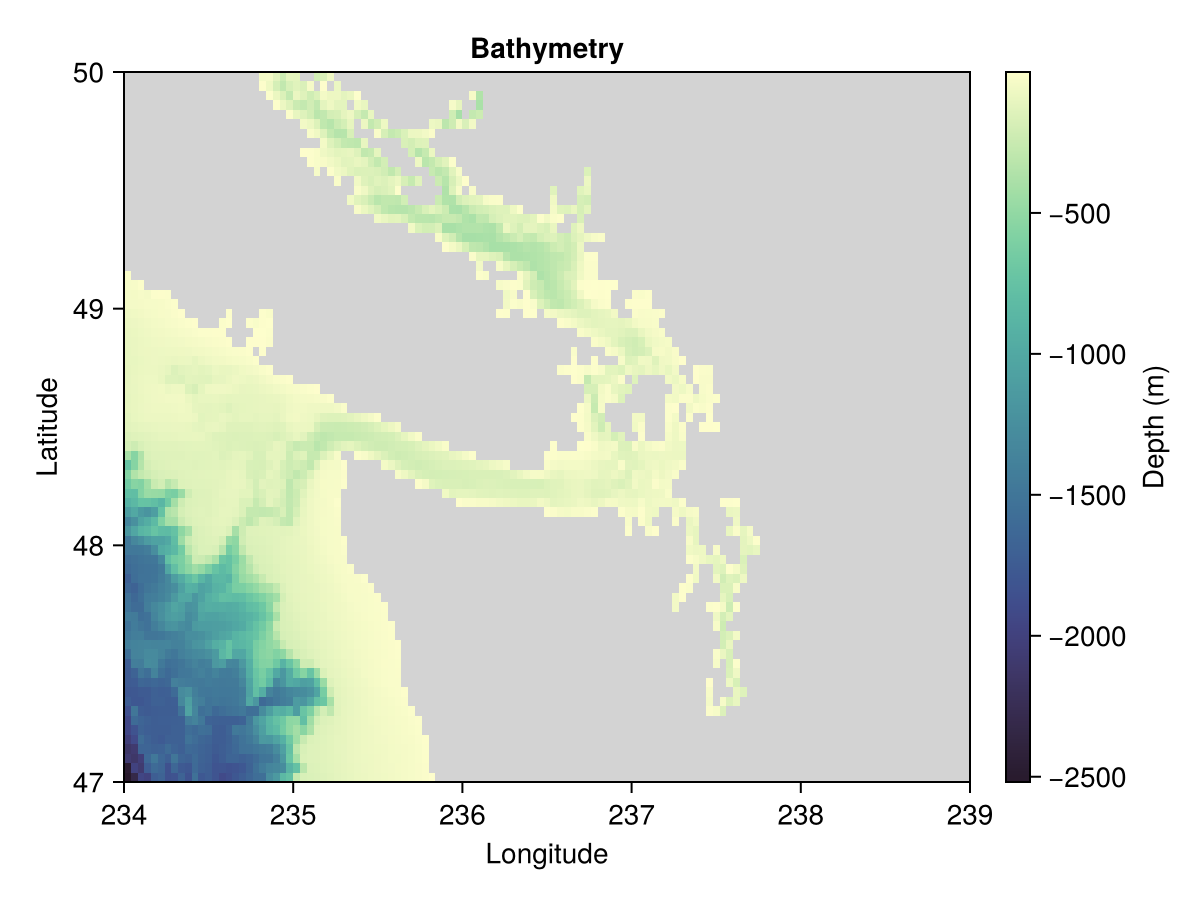

In [17]:
land = interior(bathymetry) .>= 0
interior(bathymetry)[land] .= NaN

fig = Figure()
ax = Axis(fig[1,1], title="Bathymetry", xlabel = "Longitude", ylabel = "Latitude")

#ax = Axis(fig[1, 1], title = "bathymetry", xlabel = "Longitude", ylabel = "Latitude")
hm = heatmap!(ax, bathymetry, nan_color=:lightgray, colormap = Reverse(:deep))

cb = Colorbar(fig[1, 2], hm, label = "Depth (m)")

fig
#save("different_bottom_heights.png", fig)